# Part II - (Ford GoBike Dataset Exploration)
## by (Joan Njeri)

## Investigation Overview


> Key focus for this analysis is identify features that affect bike riding and find trend and pattern of different user types behaviour when using Ford GoBike

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data includes information about 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area and 16 fetatures that includes 'duration_sec', 'start_time', 'end_time', 'start_station_id','start_station_name'and some additional variable

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#drop nulls
df.dropna(inplace = True)

In [4]:
# we running df.info() columns start_time and end_time have object type
# we convert them into datatime and extract the year from start time

df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

# extract year from start time
df['year'] = df.start_time.dt.year

#now check the year distribution 
df.year.unique()

df['age'] = (2019 - df.member_birth_year).astype(int)

#filter out the outliers in age column
df= df[df.age < 100]

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019,60


In [5]:
#calculate duration in mins
df["duration_min"] = round(df.duration_sec/60, 2)

#filter out the outliers in duration_ min column
df = df[df.duration_min < 200]
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,age,duration_min
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019,45,26.42
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019,60,29.88
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,2019,36,19.12
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,2019,30,26.92
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,2019,31,26.17


### Plot the distribution of the duration_min
> The duration of time it takes to ride a bike can be described by a uniform distribution, highest peak being at 10 minutes

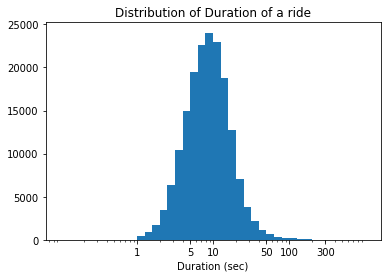

In [6]:
#Get the ticks for bins between 0 and the maximum dutation
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks for the graph
ticks = [1, 5, 10, 50, 100, 300]
# Convert ticks into string values and to be displayed on the X axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=df, x='duration_min', bins=bins);
#transform X-axis to a log scale
plt.xscale('log')
plt.title('Distribution of Duration of a ride')
plt.xlabel('Duration (sec)')

# Apply x-ticks
plt.xticks(ticks, labels);

### Plot the distribution of the riders age
> Age distribution is more concentrated between 25 to 40 years old

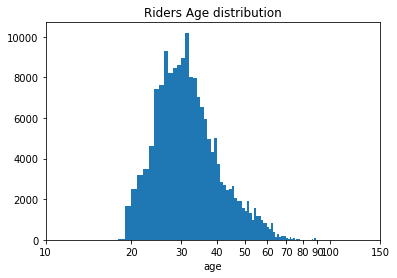

In [7]:
""""Function that generate the plot on log scale"""

def plothist(ticks,bin_size,df,x ):
    # Generate the x-ticks for the graph
    ticks = ticks
    # Convert ticks into string values and to be displayed on the X axis
    labels = ['{}'.format(v) for v in ticks]

    bin_size = bin_size
    bins=np.arange(df[x].min(), df[x].max()+bin_size, bin_size)
    plt.hist(data=df, x=x, bins=bins)
    plt.xscale('log')
    plt.xlabel(x)
    # Apply x-ticks
    plt.xticks(ticks, labels);
    
plt.title("Riders Age distribution")
plothist(ticks= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150], bin_size = 1, df = df, x = 'age')

### Plot the distribution of the gender
> > The 74.61 percent of the bike riders are male

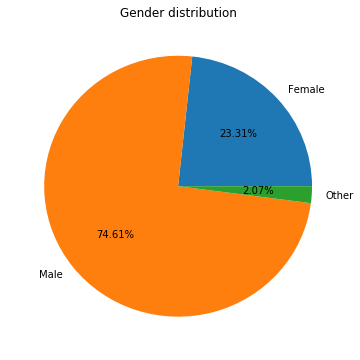

In [8]:
gender = df.groupby(['member_gender']).size().reset_index().rename(columns = {0: 'gender_count'})
#plot the distribution
plt.figure(figsize = (6,6))
plt.pie(gender.gender_count, labels= gender.member_gender,  autopct= "%.2f%%")
plt.title('Gender distribution');

### Plot the correlation between duration and age
> Duration and age has a weak negative relationship indicating the older the user, the shorter the duration of the trip

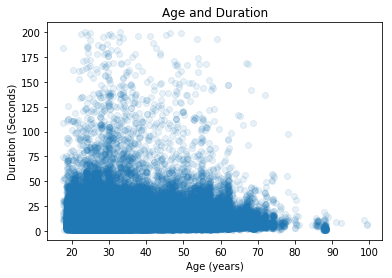

In [9]:
sb.regplot(data=df,x='age',y='duration_min',fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/10})
plt.xlabel('Age (years)')
plt.ylabel('Duration (Seconds)')
plt.title('Age and Duration');

### Plot the distribution user type and gender
> Males subscribers have the highest number of bike riders

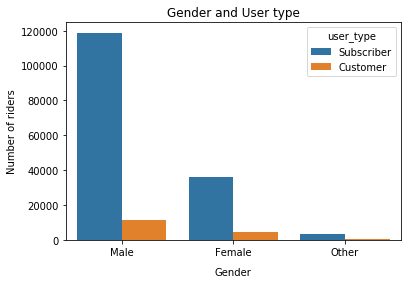

In [10]:
sb.countplot(data=df,x='member_gender',hue='user_type')
plt.xlabel('Gender',labelpad=10)
plt.ylabel('Number of riders')
plt.title('Gender and User type');

### Plot the Relationship between age, duration and gender
> Riders above the age of 65 years have shorter durations while

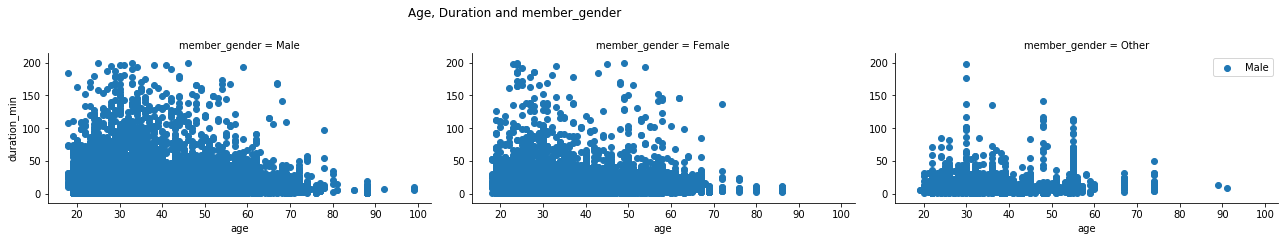

In [11]:
def scatterseparate(col):
    grid = sb.FacetGrid(data=df,col=col, aspect = 2, margin_titles = True)
    grid.map(plt.scatter,'age','duration_min')
    plt.legend(df.member_gender.value_counts().index)
    plt.suptitle('Age, Duration and ' + col ,x=0.4,y=1.1)
    
    
scatterseparate('member_gender');

### Conclusion 
> Both age and gender are important factors to the bike riders, and although we expect subscriber to take lead in trip duration customers have higer durations.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [16]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_Ford_GoBike_Dataset_Exploration_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Ford_GoBike_Dataset_Exploration_template.ipynb to slides
[NbConvertApp] Writing 446860 bytes to Part_II_slide_deck_Ford_GoBike_Dataset_Exploration_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_Ford_GoBike_Dataset_Exploration_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/